# TASK 1

### Retention is one of the most important indicators in a company. Your task is to write a function that will count the retention of players (by day from the date of registration of the player). The data are in the "shared" folder.
### The function must be written in python. During the solution you can test the function on the whole dataset or on a part (sample) of the data.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 



In [2]:
reg_data = pd.read_csv('~/shared/problem1-reg_data.csv', sep=';')
# dataset import

Looking at the dataset (data types, missing values, uid repeats, what dates are in the dataset)

In [3]:
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [4]:
reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [5]:
reg_data.shape[0]

1000000

In [6]:
reg_data.isnull().sum()

reg_ts    0
uid       0
dtype: int64

In [7]:
reg_data.uid.duplicated().sum()

0

In [8]:
pd.to_datetime(reg_data['reg_ts'], unit='s').describe(datetime_is_numeric=True)

count                          1000000
mean     2019-01-24 12:12:34.523666688
min                1998-11-18 09:43:43
25%         2018-06-03 13:55:11.500000
50%                2019-07-30 02:35:25
75%         2020-04-01 16:28:40.500000
max                2020-09-23 15:17:24
Name: reg_ts, dtype: object

In [9]:
auth_data = pd.read_csv('~/shared/problem1-auth_data.csv', sep=';')
# Import auth dataset

Looking at the dataset (data types, missing values, uid repeats, what dates are in the dataset)

In [10]:
auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [11]:
auth_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [12]:
auth_data.shape[0]

9601013

In [13]:
auth_data.isnull().sum()

auth_ts    0
uid        0
dtype: int64

In [14]:
auth_data.uid.nunique()

1000000

Here comes the function for retention


In [15]:
def retention_count(reg_data,
                    auth_data,
                    start_date,
                    end_date):
    
    """The retention_count() function takes as input two datasets with data about user registration, data about
user registration data and two dates in the format 'YYYY-MM-DD' - the dates of beginning and end of the required observations 
(for example from 2016-11-18 to 2016-12-18), the output gives a table where the columns are days since registration, 
indexes are dates of registration, and in the cells the percentage of users who entered the game on that day"""
    
    start = datetime.fromisoformat(start_date)
    end = datetime.fromisoformat(end_date)
    reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s').dt.round('d') 
    auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s').dt.round('d')  # Timestamp to dates
    
    reg_data = reg_data.query('reg_ts >= @start and reg_ts <= @end')
    auth_data = auth_data.query('auth_ts >= @start and auth_ts <= @end')    
    # Filtering dat
    
    auth_data = auth_data.merge(reg_data, on='uid')  
    # Creating a table where each authorization of the user will have its registration date in pair. 
       
    auth_data['days_since_registration'] = (auth_data['auth_ts'] - auth_data['reg_ts']).dt.days  
    # Creating a column with the number of days since user registration
    
    cohort_data = auth_data.groupby(['reg_ts', 'days_since_registration'])['uid'] \
                           .nunique().reset_index()  # count how many users registered on every day
    cohort_counts = cohort_data.pivot(index='reg_ts', 
                                      columns='days_since_registration', 
                                      values='uid')  
    # make a table with the number of players on each day depending on their registration date
    registrations = cohort_counts[0]  # Series with the number of players registered on each day of the date range
    retention = cohort_counts.divide(registrations, axis=0).round(3).mul(100)
    retention = pd.DataFrame(retention)

    return retention

In [16]:
start_date = '2016-11-18'
end_date = '2016-12-18'

In [17]:
results = retention_count(reg_data, auth_data, start_date, end_date)

In [18]:
results

days_since_registration,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
reg_ts,,,,,,,,,,,,,,,,,,,,,
2016-11-18,100.0,2.5,4.9,4.9,3.7,5.5,7.4,7.4,5.5,5.5,...,3.1,4.3,4.3,3.7,1.8,4.3,5.5,3.1,4.3,3.1
2016-11-19,100.0,3.7,3.0,3.0,7.3,8.5,9.1,5.5,4.9,5.5,...,4.9,1.8,3.7,3.7,2.4,3.0,1.8,4.3,2.4,NaN
2016-11-20,100.0,1.8,5.5,4.3,5.5,4.3,6.1,6.1,3.1,7.4,...,3.1,4.9,4.3,3.1,5.5,3.1,2.5,3.1,NaN,NaN
2016-11-21,100.0,3.7,4.9,2.4,6.1,7.3,7.9,4.9,6.1,4.3,...,3.0,3.7,3.7,3.0,2.4,4.9,1.8,NaN,NaN,NaN
2016-11-22,100.0,1.2,4.3,4.3,8.5,2.4,6.1,5.5,1.8,4.3,...,3.7,1.2,1.8,1.8,1.2,3.0,NaN,NaN,NaN,NaN
2016-11-23,100.0,3.7,4.3,3.7,6.7,7.3,6.1,5.5,7.3,4.9,...,4.3,5.5,3.7,1.8,3.0,NaN,NaN,NaN,NaN,NaN
2016-11-24,100.0,1.2,2.4,4.8,3.6,4.2,4.2,3.6,2.4,3.0,...,2.4,1.8,1.8,1.8,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-25,100.0,1.2,4.8,4.2,6.1,4.2,8.5,4.8,6.7,3.6,...,2.4,5.5,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-26,100.0,1.8,6.1,4.2,4.2,4.8,7.3,3.0,1.8,3.0,...,1.2,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def retention_vis(retention_table):
    
    """A retention table visualization function that takes retention tables as input and outputs a heatmap"""
    
    plt.figure(figsize=(26, 20))
    sns.set(font_scale=1.5)
    plt.title('Retention Table, %')
    ax = sns.heatmap(data=retention_table, annot=True, fmt='.3g', cmap='gist_heat_r')
    ax.set_yticklabels(retention_table.reset_index().reg_ts.astype(str).str[:10]) 
    plt.show()

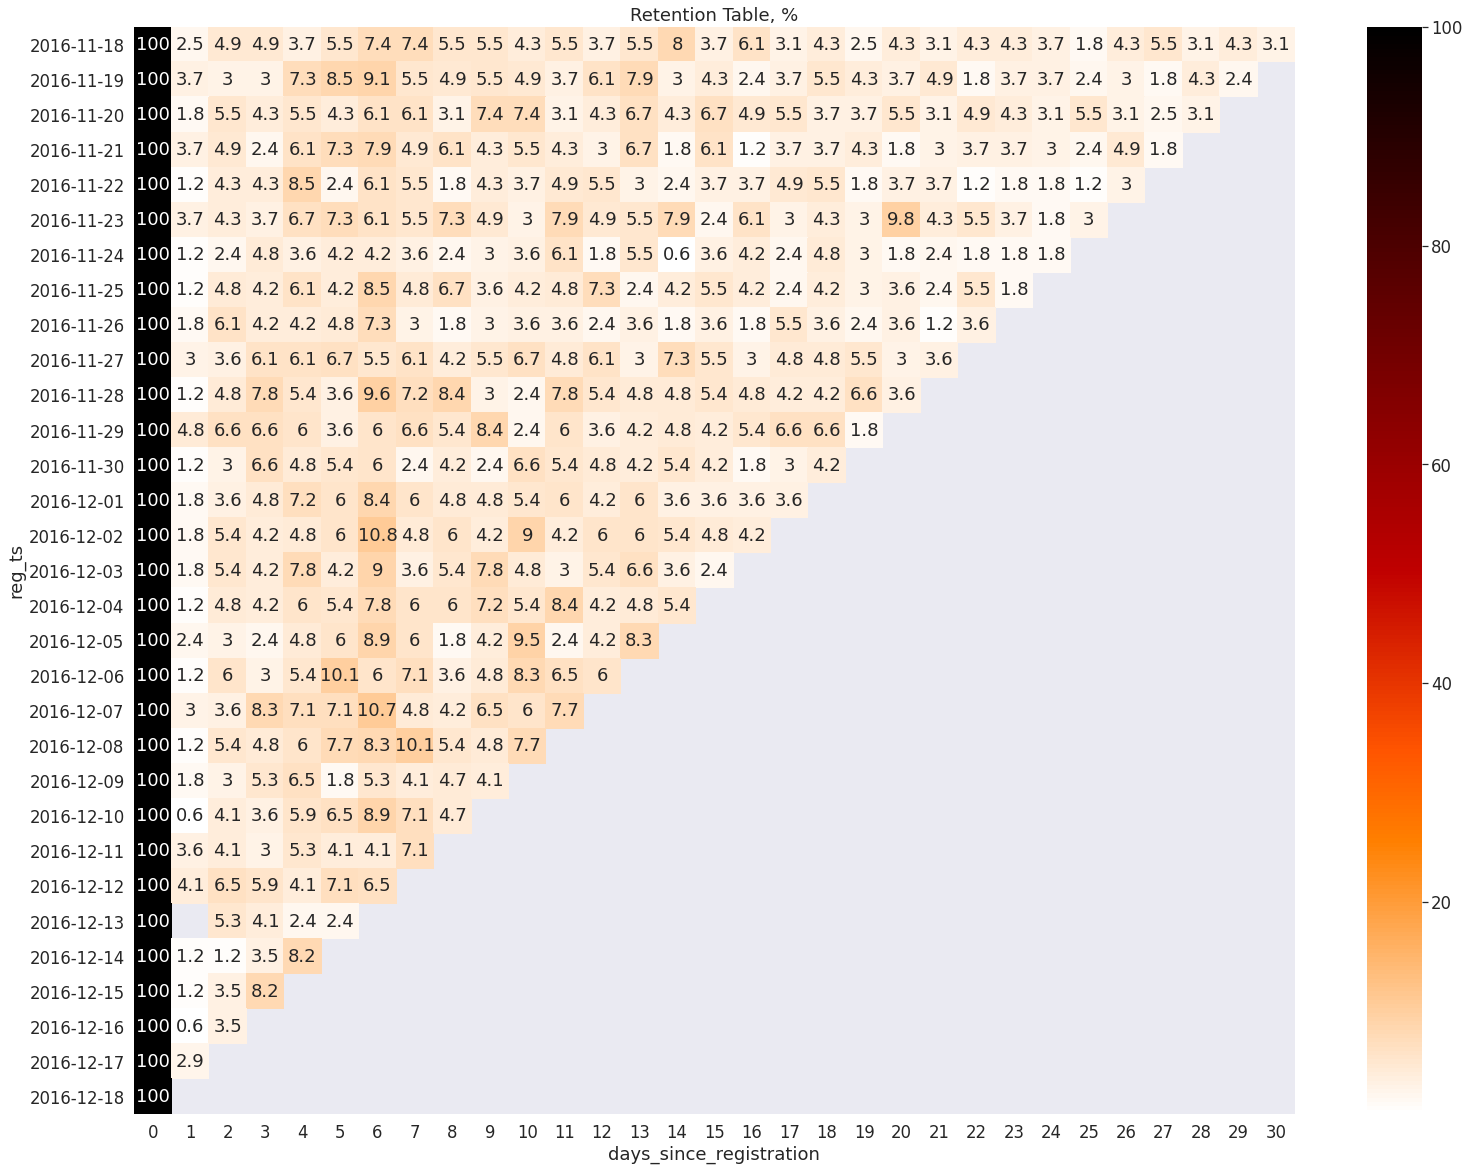

In [20]:
retention_vis(results)